In [12]:
#standard libraries
import pandas as pd
import numpy as np

#visualization tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style="whitegrid") 

#scikit-learn 
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# xgboost

from xgboost import XGBRegressor

In [13]:
df = pd.read_csv("aviachipta-narxini-bashorat-qilish/train_data.csv")
df

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,Indigo,6E-6178,Bangalore,Night,one,Early_Morning,Mumbai,Economy,7.92,45,3153
19996,19997,AirAsia,I5-582,Kolkata,Morning,one,Afternoon,Delhi,Economy,5.83,24,3911
19997,19998,Vistara,UK-832,Chennai,Early_Morning,two_or_more,Evening,Bangalore,Economy,35.33,17,14822
19998,19999,Vistara,UK-996,Mumbai,Evening,one,Morning,Bangalore,Economy,16.33,21,6450


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20000 non-null  int64  
 1   airline           20000 non-null  object 
 2   flight            20000 non-null  object 
 3   source_city       20000 non-null  object 
 4   departure_time    20000 non-null  object 
 5   stops             20000 non-null  object 
 6   arrival_time      20000 non-null  object 
 7   destination_city  20000 non-null  object 
 8   class             20000 non-null  object 
 9   duration          20000 non-null  float64
 10  days_left         20000 non-null  int64  
 11  price             20000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.8+ MB


In [15]:
df.describe()

,id,duration,days_left,price
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,12.177627,25.924150,20960.281700
std,5773.647028,7.157944,13.624874,22775.459535
min,1.000000,0.830000,1.000000,1105.000000
25%,5000.750000,6.830000,14.000000,4783.000000
50%,10000.500000,11.250000,26.000000,7425.000000
75%,15000.250000,16.080000,38.000000,42521.000000
max,20000.000000,38.580000,49.000000,114523.000000


**Visualisation**

In [16]:
df['airline'].value_counts()

Vistara      8535
Air_India    5371
Indigo       2924
GO_FIRST     1508
AirAsia      1056
SpiceJet      606
Name: airline, dtype: int64

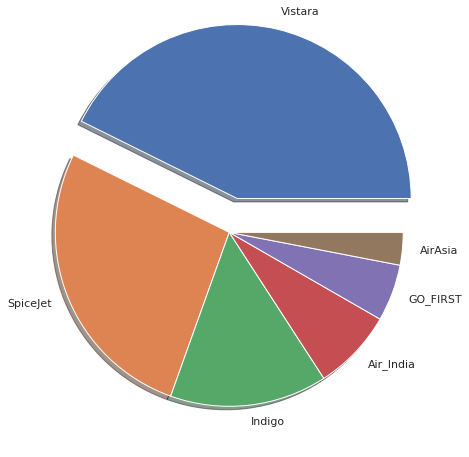

In [17]:
comps = list(df['airline'].unique())
vals = list(df['airline'].value_counts())
exp = [0.2, 0, 0, 0, 0, 0]
plt.figure(figsize=(10, 8))
plt.pie(vals, labels=comps, shadow=True, explode=exp)
plt.show()

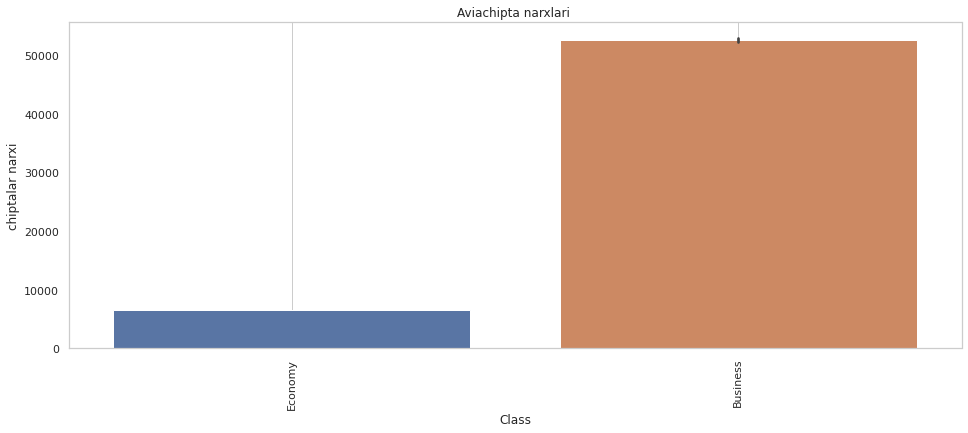

In [18]:
plt.figure(figsize=(16,6))
sns.barplot(x=df['class'] , y=df['price'])

plt.title("Aviachipta narxlari ")
plt.xlabel('Class')
plt.ylabel('chiptalar narxi')
plt.xticks(rotation=90)
plt.grid()
plt.show()

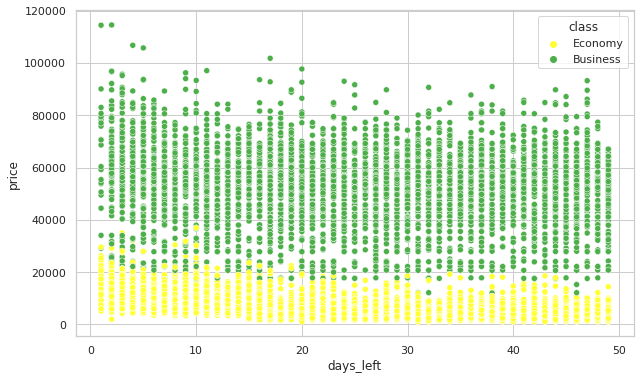

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x=df['days_left'], y=df['price'], hue='class', palette='Set1_r')
plt.show()

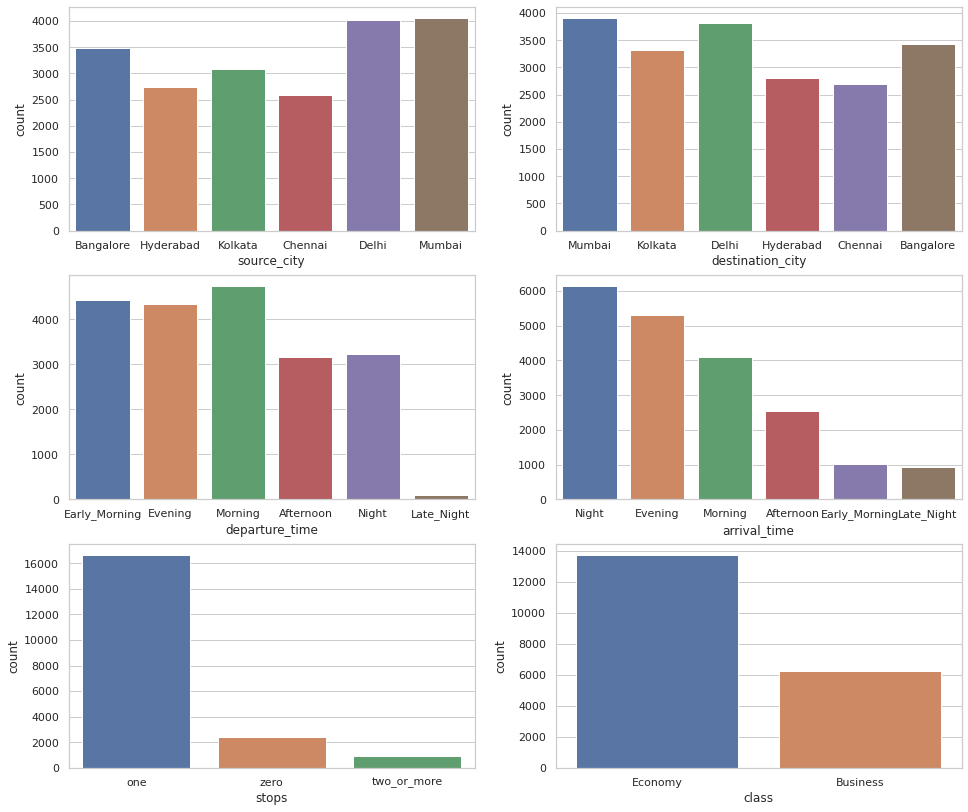

In [20]:
fig, ax = plt.subplots(3, 2, figsize=(16, 14))

sns.countplot(ax=ax[0, 0], data=df, x='source_city')
sns.countplot(ax=ax[0, 1], data=df, x='destination_city')
sns.countplot(ax=ax[1, 0], data=df, x='departure_time')
sns.countplot(ax=ax[1, 1], data=df, x='arrival_time')
sns.countplot(ax=ax[2, 0], data=df, x='stops')
sns.countplot(ax=ax[2, 1], data=df, x='class');

In [21]:
df.drop(['id','flight'], axis=1, inplace=True)

**Machine Learning StratifiedShuffleSplit orqali**

In [22]:
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for tr_idx, te_idx in strat_split.split(df, df['class']):
    st_trainset = df.loc[tr_idx]
    st_testset = df.loc[te_idx]

In [23]:
st_trainset.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
4188,Vistara,Kolkata,Evening,one,Morning,Bangalore,Economy,17.08,10,11853
9108,Air_India,Delhi,Afternoon,one,Morning,Mumbai,Business,19.08,8,53164
16660,GO_FIRST,Kolkata,Afternoon,zero,Afternoon,Mumbai,Economy,2.83,19,4499
242,Vistara,Delhi,Afternoon,zero,Evening,Kolkata,Economy,2.17,33,4000
2031,Vistara,Mumbai,Afternoon,one,Night,Hyderabad,Economy,10.50,29,3971


In [24]:
st_testset.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
5544,Vistara,Hyderabad,Afternoon,zero,Afternoon,Delhi,Economy,2.25,39,2200
11698,Air_India,Bangalore,Early_Morning,one,Early_Morning,Chennai,Economy,24.58,8,10744
11388,Vistara,Delhi,Early_Morning,one,Afternoon,Mumbai,Economy,7.00,27,5227
10218,Air_India,Chennai,Morning,one,Night,Mumbai,Business,12.25,23,49553
9697,Air_India,Chennai,Night,one,Morning,Kolkata,Economy,12.67,32,4784


In [25]:
X_train = st_trainset.drop('price', axis=1)
y = st_trainset['price'].copy()

X_num = X_train[['duration', 'days_left']]

In [26]:
# NUM PIPELINE
num_pipeline = Pipeline([
            ('std_scaler', StandardScaler())
])

In [27]:
# FULL PIPELINE

num_attribs = list(X_num)
cat_attribs = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

full_pipeline = ColumnTransformer([
              ('num', num_pipeline, num_attribs),
              ('cat', OneHotEncoder(), cat_attribs)
])

In [29]:
X_prepared = full_pipeline.fit_transform(X_train)


Linear Regression

In [31]:
LR_model = LinearRegression()

LR_model.fit(X_prepared, y)
X_test = st_testset.drop('price', axis=1)
y_test = st_testset['price'].copy()
X_test_prepared = full_pipeline.transform(X_test)
y_predicted = LR_model.predict(X_test_prepared)

mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)

print("MAE=", np.around(mae))
print("RMSE=", np.around(np.sqrt(mse)))

MAE= 4530.0
RMSE= 6614.0


RandomForest Regressor

In [32]:
RF_model = RandomForestRegressor()

RF_model.fit(X_prepared, y)
y_predicted = RF_model.predict(X_test_prepared)

mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)

print("MAE=", np.around(mae))
print("RMSE=", np.around(np.sqrt(mse)))

MAE= 2003.0
RMSE= 3891.0
